In [1]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition 
import os
from imutils import paths


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [4]:
img = face_recognition.load_image_file("pic/face.jpg")
face_encoding = face_recognition.face_encodings(img)# 얼굴의 갯수만큼 나옴,얼굴의 좌표들
#print(face_encoding)
#print(face_encoding[0].shape) #(128,) ,이미지 크기 상관없이 얼굴 하나 당 128 차원을 생성 

(128,)


In [15]:
files = os.listdir("girl") #탐색할 폴더명

known_face_encodings = []
known_face_names = []

for filename in files:
    name, ext = os.path.splitext(filename) #누구랑 비슷한지 출력하기 위함, 리스트로 보관
    if ext == '.jpg': #jpg 파일을 불러옴
        known_face_names.append(name)
        pathname = os.path.join('girl',filename) # girl 폴더 내 이미지들 붙여서 풀 path로 설정, ex `girl/han1.jpg` 식으로 완성
        img = face_recognition.load_image_file(pathname) # 인코딩을 하기위해 이미지 읽어옴,
        face_encoding = face_recognition.face_encodings(img)[0] # 발견된 얼굴 중 첫 번째 가져와서 128차원으로 저장
        known_face_encodings.append(face_encoding) # 리스트에 저장

In [16]:
print(known_face_names) # ['han1', 'oh'], 2명밖에 없어서 2명만 저장
print(len(known_face_encodings)) # 2명 각각에 대한 128차원 값들
#print(known_face_encodings[0]) #han1에 대한 128차원 값

['오연서', '한예슬']
2


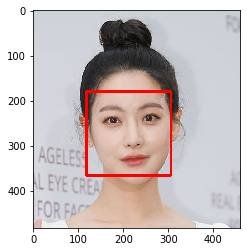

[0.1471425  0.50388711]
오연서


In [34]:
#face_recognition 얼굴인식을 위한 상위레벨 API
test = face_recognition.load_image_file("pic/oh.jpg")


face_locations = face_recognition.face_locations(test) # HOG 기반으로 얼굴 좌표 추출
top, right, bottom, left = face_locations[0]
test = cv2.cvtColor(test , cv2.COLOR_BGR2RGB)
cv2.rectangle(test, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", test) 


face_encodings = face_recognition.face_encodings(test, face_locations) # face_locations을 안주면 직접 위치를 잡고 인코딩



face_names = []
for face_encoding in face_encodings: # 사진속 얼굴이 여러명 있다고 가정할 경우
    distances = face_recognition.face_distance(known_face_encodings, face_encoding) #거리를 계산, 벡터
    print(distances)
    min_value = min(distances)#거리의 최소값 계산
    name = "Unknown" #default로 Unknow
    if min_value < 0.6: #0.6보다 작을 경우
        index = np.argmin(distances)
        name = known_face_names[index]
        
print(name)              

In [45]:
#시스템적으로 맞게 변경한 코드
from imutils import paths

imagePaths = list(paths.list_images("pic")) # 이미지파일의 목록만 알려주는 함수,known 폴더 안(하위폴더 포함)에 
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    #imagePath.split(os.path.sep) #['pic', 'oh', 'oh.jpg'] , 이미지의 full path가 리스트 형식으로 나온다.
    name = imagePath.split(os.path.sep)[-2] 
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        
import pickle
data = {"encodings": knownEncodings, "names": knownNames}
f = open("pic.bin", "wb") #open 함수를 통해 파일오픈, 쓰기(w)와 바이너리(b) 모드
f.write(pickle.dumps(data)) # 딕셔너리를 known.bin 이라는 파일에 저장
f.close()        

pic   -   pic\book1.jpg
pic   -   pic\book2.jpg
pic   -   pic\book3.jpg
pic   -   pic\book4.jpg
pic   -   pic\cars.jpg
pic   -   pic\dog2.jpg
pic   -   pic\eye_mask.png
pic   -   pic\face.jpg
pic   -   pic\face2.jpg
pic   -   pic\facial_landmarks_68markup.jpg
pic   -   pic\po.jpg
pic   -   pic\single.jpeg
girl   -   pic\girl\girl1.jpg
girl   -   pic\girl\girl2.jpg
girl   -   pic\girl\girl3.jpg
group   -   pic\group\group.jpg
group   -   pic\group\group2.jpg
HanYeSeul   -   pic\HanYeSeul\han.jpg
HanYeSeul   -   pic\HanYeSeul\han2.jpg
HanYeSeul   -   pic\HanYeSeul\han3.jpg
HanYeSeul   -   pic\HanYeSeul\han4.jpg
HanYeSeul   -   pic\HanYeSeul\han5.jpg
OhYeonSeo   -   pic\OhYeonSeo\oh.jpg
son   -   pic\son\son.jpg
son   -   pic\son\son2.jpg


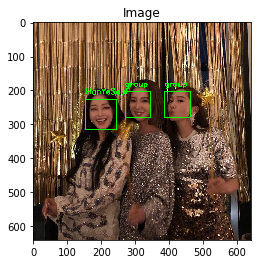

In [46]:
data = pickle.loads(open("pic.bin", "rb").read())
 
image = cv2.imread("group3.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "Unknown"
    if True in matches: # 매칭되는게 있다면
        matchedIdxs = [i for (i, b) in enumerate(matches) if b] # matches 값은 true,false 리스트 , b가 true 일 경우 matchedIdxs를 리스트로 지정
        counts = {} 
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1  #파이썬다운 코드 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)

imshow("Image", image)


"""
a = {}
a['hello'] 호출시 에러발생
a.get('hello', 0) #'hello' 키가 있는경우 'hello'키겂 호출 , 없으면 0으로 반환
"""

In [47]:
encoding = encodings[0]
matches = face_recognition.compare_faces(data["encodings"], encoding)
print(matches)

matchedIdxs = [ i for (i,b ) in enumerate(matches) if b] #누구랑 매칭되는지 가져오기
print(matchedIdxs)


for i in matchedIdxs:
    name = data['names'][i]
    counts[name] = counts.get(name,0) + 1

name = data['names'][11]
print(data['names'])
print(name)



[False, True, True, False, True, False, False, True, True, True, False, False, True, True, True, True, False, True, True, True, True, True, True, True, False, False]
[1, 2, 4, 7, 8, 9, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23]


In [52]:
feature = np.array(data["encodings"])
print(feature.shape)

(26, 128)


In [54]:
import pandas as pd
c = pd.factorize(data["names"])
print(c)
label = c[0]
print(label)


(array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 4, 5, 5], dtype=int64), array(['pic', 'girl', 'group', 'HanYeSeul', 'OhYeonSeo', 'son'],
      dtype=object))
[0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 4 5 5]
